# Question 4
Suppose that you want to build a portfolio with the stocks (with tickers of) AAPL, GOOG,
AMZN and FB. You plan to retrieve the relevant yahoo finance data with the ‘yfinance’
python module from 1st of Jan. 2017 to 31st of Dec. 2020 (inclusive)

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

## Part A
Suppose that you want to build a portfolio with the stocks (with tickers of) AAPL, GOOG,
AMZN and FB. You plan to retrieve the relevant yahoo finance data with the ‘yfinance’
python module from 1st of Jan. 2017 to 31st of Dec. 2020 (inclusive)

In [5]:
tickers_port = ['AAPL', 'AMZN', 'GOOGL', 'FB']

stock_data_port = yf.download(tickers_port, start="2017-01-01", end="2020-12-31")
stock_data_port = stock_data_port.sort_values(by='Date')
stock_prices_port = stock_data_port['Adj Close']
stock_returns_port = stock_prices_port.pct_change()[1:]

stock_returns_port.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,FB,GOOGL
Date,,,,
2017-01-04,-0.001119,0.004657,0.015660,-0.000297
2017-01-05,0.005085,0.030732,0.016682,0.006499
2017-01-06,0.011148,0.019912,0.022707,0.014993
2017-01-09,0.009159,0.001168,0.012074,0.002387
2017-01-10,0.001009,-0.001280,-0.004404,-0.001414


## Part B
Based on a), find the covariance matrix of these stocks. [1 mark]

In [7]:
stock_returns_cov = stock_returns_port.cov()
stock_returns_cov

,AAPL,AMZN,FB,GOOGL
AAPL,0.000398,0.000246,0.000263,0.000236
AMZN,0.000246,0.000372,0.000261,0.000228
FB,0.000263,0.000261,0.000460,0.000263
GOOGL,0.000236,0.000228,0.000263,0.000305


## Part C
Suppose that the four stocks are equally weighted, find the annualised portfolio
expected returns and portfolio variance. [2 marks]

In [13]:
portfolio_weights = np.array([0.25, 0.25, 0.25, 0.25])
weighted_returns = stock_returns_port.mul(portfolio_weights, axis=1)
portfolio_returns = weighted_returns.sum(axis=1)
# ((1 + mean_return_daily) ** 252) - 1
annualised_portfolio_return = ((1 + np.mean(portfolio_returns)) ** 252) - 1
print(f"Annualised Portfolio Return: {annualised_portfolio_return}")

Annualised Portfolio Return: 0.4060069289922592


In [15]:
annualised_cov = (stock_returns_cov) * 252
port_variance = np.dot(portfolio_weights.T, np.dot(annualised_cov, portfolio_weights))
print(f"Annualised Portfolio Variance: {port_variance}")

Annualised Portfolio Variance: 0.07134943648088476


# Part D
Find the efficient portfolio with the maximum Sharpe ratio. What is the
corresponding Sharpe ratio? [2 marks]

In [26]:
mu = expected_returns.mean_historical_return(stock_prices_port)
print(mu, '\n')
sigma = risk_models.sample_cov(stock_prices_port)
print(sigma)

AAPL     0.486705
AMZN     0.446585
FB       0.235798
GOOGL    0.211426
dtype: float64 

           AAPL      AMZN        FB     GOOGL
AAPL   0.100298  0.062093  0.066360  0.059353
AMZN   0.062093  0.093820  0.065851  0.057547
FB     0.066360  0.065851  0.115842  0.066238
GOOGL  0.059353  0.057547  0.066238  0.076746


In [42]:
ef = EfficientFrontier(mu, sigma)
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
cleaned_weights_maxsharpe

OrderedDict([('AAPL', 0.55613),
             ('AMZN', 0.44387),
             ('FB', 0.0),
             ('GOOGL', 0.0)])

In [43]:
ef.portfolio_performance(verbose=True)

Expected annual return: 46.9%
Annual volatility: 28.3%
Sharpe Ratio: 1.59


(0.4688964543572316, 0.28312518333337183, 1.585505213885085)

## Part E
Plot the efficient frontier. [3 mark]

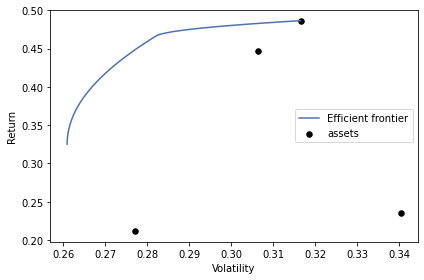

In [46]:
ef = EfficientFrontier(mu, sigma)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()